<a href="https://colab.research.google.com/github/Sachinsatya/data_insights-/blob/main/Intro_to__MNIST_(Keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Deep Learning Framework - 
# Erstwhile Framework -  
# 1. Caffe/2 
# 2. Teano 
# 3. Torch


# As of Today - 
# 1. TensorFlow (Google) | Industry 
# 2. PyTorch    (Meta)   | Research


# Wrapper - 
# 1. Keras (Official API for TF)

In [ ]:
# Check if TensorFlow is installed or not ? 
! pip show tensorflow

Name: tensorflow
Version: 2.11.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.8/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [ ]:
# Install Tensorflow
# ! pip install tensorflow

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
# Keras resides in Tensorflow, so we dont need to import it!!!! 

In [ ]:
tf.keras.__version__

'2.11.0'

In [ ]:
# MNIST - 

# is Handwritten digits from (0-9)
# These are images (single channel images) with size 28x28 
# 60K training digits and ~10K test digits

In [ ]:
# Objective - 
# Image --> [DL Model] --> Predict the digit
# x - Input - Images 
# y - Output - Digit/Labels 

In [ ]:
# Download the data - 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Dataset is divided in 2 parts - 
# Train (60k samples)
# Test  (10k sample)

In [ ]:
# Training - this data will be used to train the model 
# input - Images
print(x_train.shape)
# (60000, 28, 28) - Num of images x height x width

(60000, 28, 28)


In [ ]:
# Testing - this data will be used by the model to test its accuracy 
print(x_test.shape)

(10000, 28, 28)


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
# 60K images are present in x_train
# Let's pick the first images from array
sample_image = x_train[0] # give me the first image

In [ ]:
sample_image.shape

(28, 28)

In [ ]:
print(sample_image)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

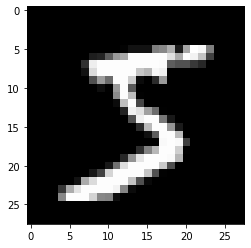

In [ ]:
plt.imshow(sample_image, cmap="gray")

In [ ]:
print(y_train[0])

5


In [ ]:
# 60K images with their correct label..... 

# This function will pick up images from train dataset and 
# - plot the image
# - print the correct label
def plot_digits(random_number):
  if random_number >= 60000:
    return "Train Dataset has only 60K images"
  random_image = x_train[random_number]
  plt.imshow(random_image, cmap='gray')
  print(f"Correct Label: {y_train[random_number]}")

Correct Label: 9


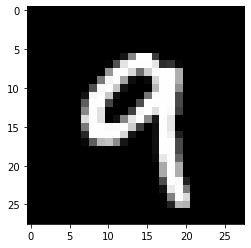

In [ ]:
plot_digits(110)

Correct Label: 2


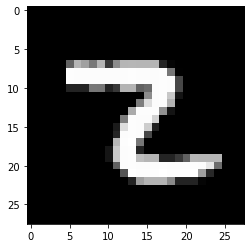

In [ ]:
plot_digits(np.random.randint(0, 60000, 1)[0])

In [ ]:
# plot multiple images .. 

# Where are all the 0 images ? 
# go to y_train and ask for digit 0 

zero_images = np.where(y_train == 0)[0][:10]
# index where "0 digit" images are present

In [ ]:
one_images = np.where(y_train == 1)[0][:10]
two_images = np.where(y_train == 2)[0][:10]

In [ ]:
len(zero_images)

10

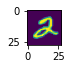

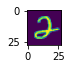

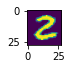

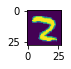

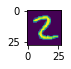

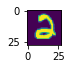

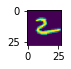

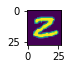

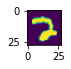

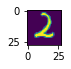

In [ ]:
for i in range(10):
  plt.figure(figsize=(8, 5))
  # plt.subplot(1, 11, i+1)
  # plt.imshow(x_train[zero_images[i]])
  plt.subplot(1, 11, i+1)
  plt.imshow(x_train[two_images[i]])

In [ ]:
# is this dataset class wise balanced ?

In [ ]:
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
np.random.choice(np.where(y_train == 5)[0], 10)[0]

35077

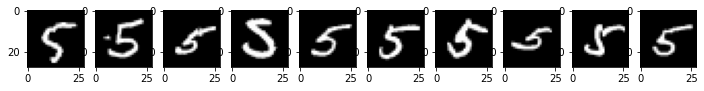

In [ ]:
plt.figure(figsize=(12,10))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(x_train[np.random.choice(np.where(y_train == 5)[0], 1)[0]], cmap="gray")

In [ ]:
# objective - 
# to plot random 10 images of 5 digit! 

In [ ]:
np.where(y_train == 5) # returns index where digit 5 is present

(array([    0,    11,    35, ..., 59968, 59993, 59997]),)

In [ ]:
np.where(y_train == 5)[0].shape # there are 5421 images which are labelled as 5! 

(5421,)

In [ ]:
np.random.choice(np.where(y_train ==5)[0], 10) # out of these 5421 it returns me only 10 random images

array([49991, 23200, 36089, 50383,  9138,  1278, 31253,  2698, 50316,
        9228])